# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This Dataset is called No-show appointment Dataset. It contains obersevation of patient in Brazil that may or may not show up for their Medical Appointment, in addtion to 14 features that would help to see patterns and predict possible reasons why some patients miss their appointments.
<ul>
    <li>PatientId : Identification number for a patient</li>
    <li>AppointmentID : Identification number for each appointment</li>
    <li>Gender: Male or Female</li>
    <li>ScheduledDay: The original date on which appointment was scheduled</li>
    <li>AppointmentDay: The date on which pateint has to show-up for the appointment</li>
    <li>Age: How old the patient is</li>
    <li>Neighbourhood: Hospital or clinic location</li>
    <li>Scholarship: Whether the patient is enrolled in Bolsa_Família</li>
    <li>Hipertension: Part of patient's medical history.</li>
    <li>Diabetes: Part of patient's medical history.</li>
    <li>Alcoholism: Part of patient's medical history.</li>
    <li>Handcap: Handicap, part of patient's medical history.</li>
    <li>SMS_received: Frequent reminders of scheduled appointment.</li>
    <li>No-show:'Yes' means the patient did not attended the appointment</li>
</ul>


### Question(s) for Analysis
<ul>
<li><a href="#ques1">Does females shows up more than males for appointments?</a></li>
<li><a href="#ques2">What is the percentage of the appointments that has not been attended?</a></li>
<li><a href="#ques3">Does having a scholarship encourage patients to show up for their appointment?</a></li>
<li><a href="#ques4">How frequently each age of patients appear to be having a scholarship?</a></li>
</ul>

In [51]:
% matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [52]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


# <a id='wrangling'></a>
## Data Wrangling

>Data wrangling is composed of 3 main steps:
<ol>
    <li><a href="#Gaz">Data Gathering</a></li>
    <li><a href="#Ase">Data Assessing</a></li>
    <li><a href="#cls">Data Cleaning</a></li>
</ol>

<a id='Gaz'></a>
### Data Gathering
> The first step in data wrangling is data gathering, so here we use pandas to read a CVS flat file and asign it to a dataframe called df.
 

In [53]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='Ase'></a>
### General Properties (Assessing The Data)
> Now we will go through the dataset and explore it to see how can it be cleaned to better describe the data in it.

First lets get a look at the first 5 rows of the dateset in tabular format, to build an image on how each row and column is structured.

In [54]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Apparently there is some data that seems hard to comprihend, and the tile of hypertension column is missspelled as hipertension.

Take a look at the Gender column the data is recoreded as "M" or "F" for each patient which can be confusing for someone whom is not familiar with these abbreviations so lets make sure that we change them to "Male" and "Female" respectively.

Is it really the best practice to describe the data in the colums Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received as 1 and 0 instead of (true or false) or (yes or no)?

For the ScheduledDay and AppointmentDay columns, it might be a good idea if we convert them to datetime

Now lets get an idea about the data type for each column and determine if it is the appropriate type, also to check if the dataset is suffering form any nulls or missing values.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Now we know that our dataset has 110527 entries.

Clearly we can see that the columns Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received are of integer data type while they are obviously categorical date type so they should be they should be changed to strings.

 Notice that PatientId and AppointmentID are numarical categorical data so it is adviced to change their data types too.

When using the info method we did not find any missing values (null) but just to be sure lets count any missing data in each column here:

In [56]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

So, Yes now we are sure that our data set is full and does not have any missing values.

Now as we are sure there is no nulls in our dataset, lets check out if we have any duplicated rows in it and count them if any:

In [57]:
df.duplicated().sum()

0

Okay, that is kind of assuring but at the same time seems like it is too good to be true; lets check if all of our rows have unique data espically for the IDs that should be unique for each patient: 

In [58]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Notice that our dataset is actually collected from 81 different hospitals and clinics.

Notice that Handcap actually have 5 unique values, looks like it might not be simple to turn in to categorical strings, lets wait and see.

So, if the dataset has 110527 entries why is the number of unique PatientIds only 62299? lets check these duplicates:

In [59]:
df['PatientId'].duplicated().sum()

48228

So there are 48228 patients may have made multible appointments or that we had their data dupliccated by mistake. Lets check is there is any duplicates in the AppointmentsIDs (we already know there is no duplicates but just for elaboration)

In [60]:
df['AppointmentID'].duplicated().sum()

0

No duplicates in the AppointmentIDs, this indicate that the 48228 patients are actually returning patients.

Next lets compare the counts for each of the unique values for some of the rest of the columns: (I will be using print function here although it is not needed, just to exclude the dtype of the output using .to_string())

In [61]:
print(df['Gender'].value_counts().to_string())

F    71840
M    38687


We can see that females book significantly more appointments that males, can this be of any statistical significance?

In [62]:
print(df['SMS_received'].value_counts().to_string())

0    75045
1    35482


Most of the patients who book appointments did not recive SMS.

In [63]:
print(df['No-show'].value_counts().to_string())

No     88208
Yes    22319


So, excatly 22319 patients did not show up for their booked appointments.

In [64]:
print(df['Handcap'].value_counts().to_string())

0    108286
1      2042
2       183
3        13
4         3


How can we deal with 5 levels of handcap to test their effect on missing appointments?

Now we want to describe our data to get statistical values like the mean and standard diviation, but lets think about it the only column that contain quantitative data that can be of use here is Age column so lets focus on it:

In [65]:
print(df['Age'].describe().to_string())

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000


How can it be it is unlogical that the minimum age = -1 it must be a typo. But judging by the mean is it possible that it might be more than once typo? lets check if there is anymore values that is negative or less that 1 year old

In [66]:
df.Age[df.Age <= 0].count()

3540

In [67]:
df.Age[df.Age == -1].count()

1

Okay that will need cleaning because it does not make sense that someone is -1 year old on zero and book an oppointment

<a id='cls'></a>
### Data Cleaning
> The next step after assessing and exploring the data is cleaning it so it can be used efficiently in predictions and visualizations.

First lets correct the typo in the Hipertension column name and change the No-show to better name:

In [68]:
df.rename(columns = {'Hipertension':'Hypertension', 'No-show':'Did_Not_Show'}, inplace = True)

Next, we will change all the 'F' and 'M' to 'Female' and 'Male' in Gender column:

In [69]:
df["Gender"].replace('F', 'Female', inplace=True)
df["Gender"].replace('M', 'Male', inplace=True)

Now to change all the binary 0 and 1 in these columns Scholarship, Hypertension, Diabetes, Alcoholism, SMS_received to 'No' or 'Yes' respectively:

In [70]:
df["Scholarship"].replace(0, 'No', inplace=True)
df["Scholarship"].replace(1, 'Yes', inplace=True)

In [71]:
df["Hypertension"].replace(0, 'No', inplace=True)
df["Hypertension"].replace(1, 'Yes', inplace=True)

In [72]:
df["Diabetes"].replace(0, 'No', inplace=True)
df["Diabetes"].replace(1, 'Yes', inplace=True)

In [73]:
df["Alcoholism"].replace(0, 'No', inplace=True)
df["Alcoholism"].replace(1, 'Yes', inplace=True)

In [74]:
df["SMS_received"].replace(0, 'No', inplace=True)
df["SMS_received"].replace(1, 'Yes', inplace=True)

Now we should do the same to categorize the patients to either handcaps or not so we will change all the values that is not 0 to 'Yes' and will change 0 to 'No':

In [75]:
df["Handcap"].replace(0, 'No', inplace=True)
df["Handcap"].replace(1, 'Yes', inplace=True)
df["Handcap"].replace(2, 'Yes', inplace=True)
df["Handcap"].replace(3, 'Yes', inplace=True)
df["Handcap"].replace(4, 'Yes', inplace=True)

Now lets convert ScheduledDay and AppointmentDay columns to datetime:

In [76]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

Finally, we should change the date type of both PatientId and AppointmentID to strings as they are numarical categorical data:

In [77]:
df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)

Now to have a look on the types of data after cleaning them:

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null object
Hypertension      110527 non-null object
Diabetes          110527 non-null object
Alcoholism        110527 non-null object
Handcap           110527 non-null object
SMS_received      110527 non-null object
Did_Not_Show      110527 non-null object
dtypes: datetime64[ns, UTC](2), int64(1), object(11)
memory usage: 11.8+ MB


Now lets have another look at the first 5 rows of the dataset after cleaning:

In [79]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Did_Not_Show
0,29872499824296.0,5642903,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,558997776694438.0,5642503,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,4262962299951.0,5642549,Female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,867951213174.0,5642828,Female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,8841186448183.0,5642494,Female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


Now to finish cleaning up the data lets deal with the anomalies in the Age column: (By changing the single entry of -1 t0 1 "which make more sense" and all the 0 to 1 as even babies who's parents are booking appointments are most propaply at least few month old:

In [80]:
df["Age"].replace(-1, 1, inplace=True)
df["Age"].replace(0, 1, inplace=True)

Now lets check the Age describtion again:

In [81]:
df["Age"].describe()

count    110527.000000
mean         37.120912
std          23.059403
min           1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Yes, now it make more sense.

<a id='eda'></a>
## Exploratory Data Analysis

<a id='ques1'></a>
###  Does females shows up more than males for appointments?

Lets have a look at the total number of both females and males that have booked an oppointment:

In [82]:
print(df['Gender'].value_counts().to_string())

Female    71840
Male      38687


It is very clear that the population of females is larger than the population of males. lets visulaize it in a pie chart:

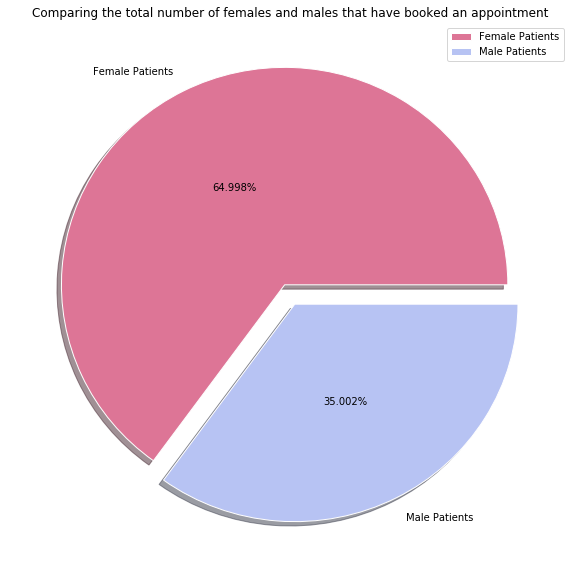

In [83]:
df.Gender.value_counts().plot(title='Comparing the total number of females and males that have booked an appointment',
                              kind='pie',
                              autopct = '%1.3f%%', 
                              pctdistance=0.5,
                              explode = [0.05,0.05], 
                              figsize=(10,10),
                              labels = ['Female Patients', 'Male Patients'],
                              wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
                              colors = ['#DD7596', '#B7C3F3'],
                              shadow= True).set_ylabel('');
plt.legend();

Okay, now this was the total number of females to the total number of males whom have booked an appointment, lets see which of them was more commitment towards those appointments, or are they both as committed as each other:

In [84]:
df.groupby('Did_Not_Show').Gender.value_counts().to_frame()

Gender
Did_Not_Show Gender        
No           Female   57246
             Male     30962
Yes          Female   14594
             Male      7725

Now let's plot these counts into a bar chart:

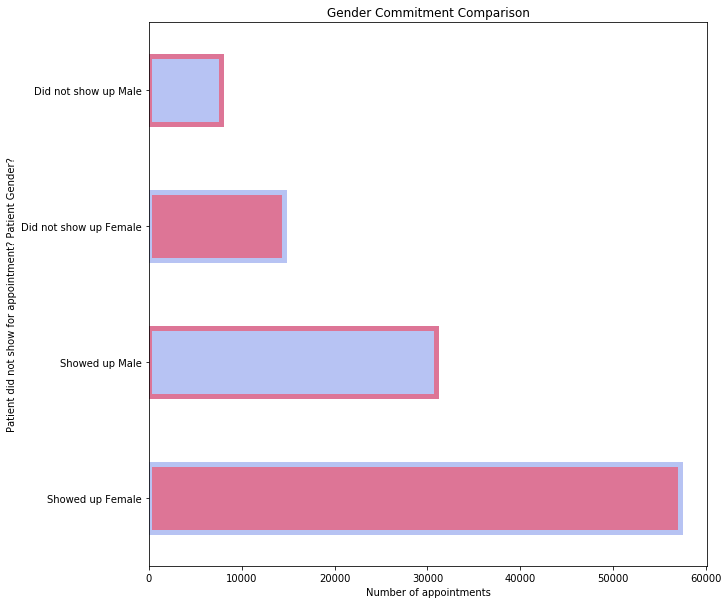

In [85]:
def plotwlabel(p, xlabel='',ylabel=''):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return
plotwlabel(df.groupby('Did_Not_Show').Gender.value_counts().plot(kind='barh',
                                                                 title='Gender Commitment Comparison',
                                                                 figsize=(10,10),
                                                                 color=['#DD7596','#B7C3F3','#DD7596','#B7C3F3'],
                                                                 edgecolor=['#B7C3F3','#DD7596','#B7C3F3','#DD7596'],
                                                                 lw = 5,).set_yticklabels(['Showed up Female',
                                                                                          'Showed up Male',
                                                                                          'Did not show up Female',
                                                                                          'Did not show up Male']),
           "Number of appointments",
           "Patient did not show for appointment? Patient Gender?");

In [86]:
print('Exactly '+str((int(df[(df['Gender']=='Female')&(df['Did_Not_Show']=='Yes')].Did_Not_Show.count())/
                 int(df.Gender[df.Gender == 'Female'].count())*100))+
      '% of the total Female patients did not show up for their appointments.')
print('Also exactly '+str((int(df[(df['Gender']=='Male')&(df['Did_Not_Show']=='Yes')].Did_Not_Show.count())/
                 int(df.Gender[df.Gender == 'Male'].count())*100))+
      '% of the total Male patients did not show up for their appointments.')

Exactly 20.31458797327394% of the total Female patients did not show up for their appointments.
Also exactly 19.967947889471915% of the total Male patients did not show up for their appointments.


Let's vigualize this percentage in a pie chart "We will do only the females example, because both of them have the same showing up percentage":

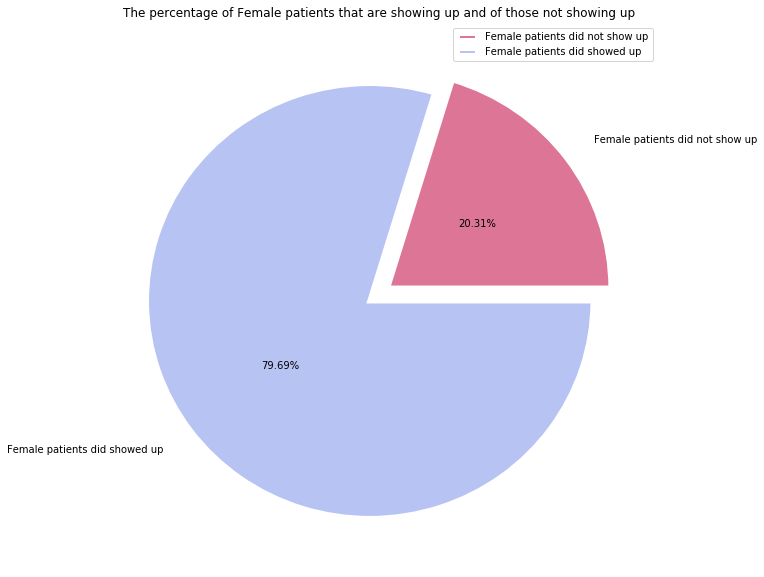

In [87]:
plt.pie([(int(df[(df['Gender']=='Female')&(df['Did_Not_Show']=='Yes')].Did_Not_Show.count())/
                int(df.Gender[df.Gender == 'Female'].count())*100),
         (100 - (int(df[(df['Gender']=='Female')&(df['Did_Not_Show']=='Yes')].Did_Not_Show.count())/
                int(df.Gender[df.Gender == 'Female'].count())*100))], 
        labels=['Female patients did not show up', 'Female patients did showed up'],
        labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }, 
        colors = ['#DD7596', '#B7C3F3'], 
        autopct = '%1.2f%%',
        pctdistance=0.5,
        explode = [0.05,0.05]);
plt.gcf().set_size_inches(10,10);
plt.title("The percentage of Female patients that are showing up and of those not showing up");
plt.legend();

### Answer: 
>We can confidently confirm that "neither Females nor Males" significanly show neither more commitment nor more slack towards showing up for their booked appointment. To put it straight "Gender" has no impact whatsoever on the commitment towards showing up for medical appointments.

<a id='ques2'></a>
### What is the percentage of the appointments that has not been attended?

lets check out the percentage of both appointment (attened or not): "No conote to attende"

In [88]:
df["Did_Not_Show"].value_counts()/len(df) * 100

No     79.806744
Yes    20.193256
Name: Did_Not_Show, dtype: float64

As we can see around 79.8% of the appointments were actually fulfilled and attend by the booking patient. Now lets visualize it in a pie chart:

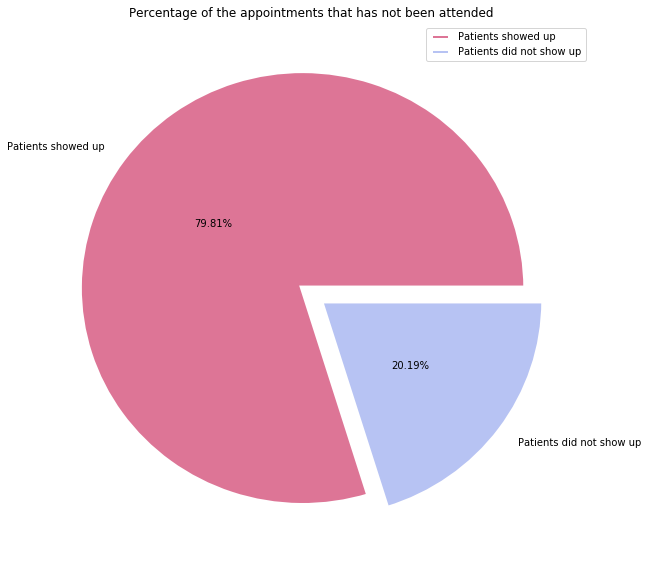

In [89]:
(df["Did_Not_Show"].value_counts()/len(df) * 100).plot(kind="pie", 
                                                       autopct = '%1.2f%%',
                                                       pctdistance=0.5,
                                                       explode = [0.05,0.05],
                                                       figsize=(10,10),
                                                       wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },
                                                       labels = ['Patients showed up', 'Patients did not show up'],
                                                       colors = ['#DD7596', '#B7C3F3']).set_ylabel('');
plt.title("Percentage of the appointments that has not been attended");
plt.legend();

### Answer:
>Around 20.19% of the appointments were not attend by the booking patient.

<a id='ques3'></a>
### Does having a scholarship encourage patients to show up for their appointment?

First, let's see: "How many patients have Scholarship aid?"

In [90]:
df.Scholarship[df.Scholarship == 'Yes'].count()

10861

How many of these patients "with scholarship" showed up and how many did not show up? Note: No = showed up, yes = Did not show up.

In [91]:
df.groupby('Scholarship').Did_Not_Show.value_counts().loc['Yes'].to_frame()

,Did_Not_Show
Did_Not_Show,
No,8283
Yes,2578


What is their "Rounded" percentage of the total patients?

In [92]:
print(str(round(df.Scholarship[df.Scholarship == 'Yes'].count()/len(df)*100))+
      '% of the patients that have booked an appointments had Scholarship aid.')

10% of the patients that have booked an appointments had Scholarship aid.


Now, let's see it in a pie chart:

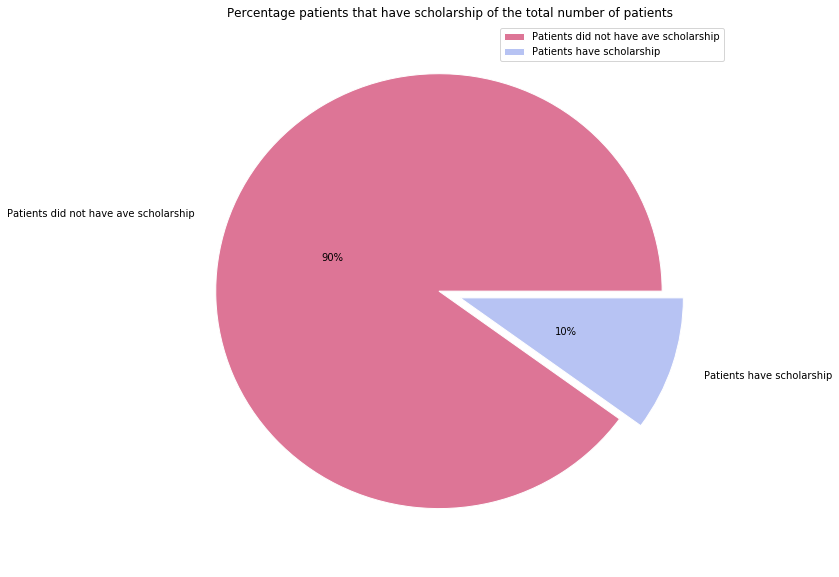

In [93]:
round(df['Scholarship'].value_counts()/len(df)*100).plot(kind="pie",
                                                         autopct = '%1.0f%%',
                                                         pctdistance=0.5,
                                                         explode = [0.05,0.05],
                                                         figsize=(10,10),
                                                         colors = ['#DD7596', '#B7C3F3'],
                                                         wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
                                                         labels=['Patients did not have ave scholarship',
                                                                 'Patients have scholarship'],
                                                         labeldistance=1.15, ).set_ylabel('');
plt.title("Percentage patients that have scholarship of the total number of patients");
plt.legend();

Okay, wonderful now that is not a large percentage.

Let's have a look at the numbers of the patients who did have the scholarship and see how many of them missed their appointments:

In [94]:
print('There are ' +str(df[(df['Scholarship'] == 'Yes')&(df['Did_Not_Show'] == 'Yes')].Did_Not_Show.count())
      +' patients with aiding scholarship but did not show up for their appointments.'+'\nWhile there are '
      +str(df[(df['Scholarship'] == 'Yes')&(df['Did_Not_Show'] == 'No')].Did_Not_Show.count())
      +' patients with aiding scholarship did show to their appointments.')

There are 2578 patients with aiding scholarship but did not show up for their appointments.
While there are 8283 patients with aiding scholarship did show to their appointments.


In [95]:
print('This means that only around '+str(round((int(df[(df['Scholarship']=='Yes')&
     (df['Did_Not_Show']=='Yes')].Did_Not_Show.count())/int(df.Scholarship[df.Scholarship == 'Yes'].count()))*100))
      +'% of the original 10% of all the patients that have scholarship aid did not show up for the appointments.')

This means that only around 24% of the original 10% of all the patients that have scholarship aid did not show up for the appointments.


So, now we can visualize the percentage in a pie chart, let's do that:

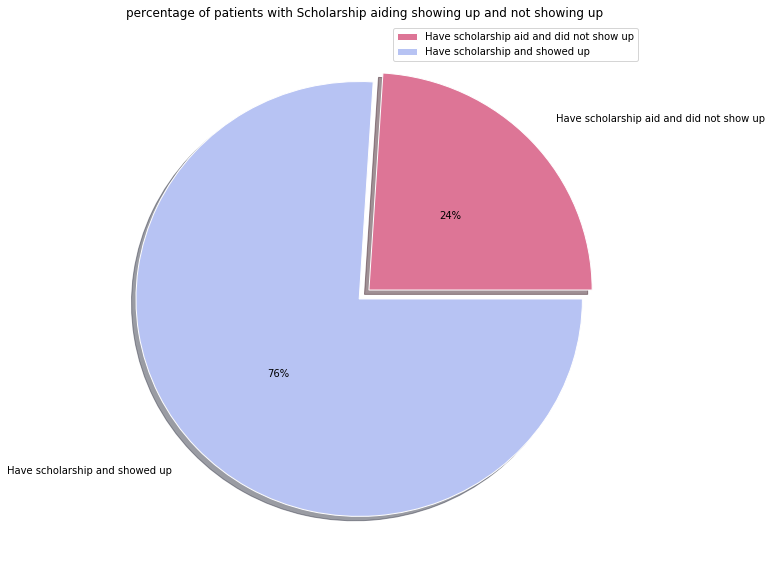

In [96]:
plt.pie([round((int(df[(df['Scholarship']=='Yes')&(df['Did_Not_Show']=='Yes')].Did_Not_Show.count())/
                int(df.Scholarship[df.Scholarship == 'Yes'].count()))*100),
         (100 - round((int(df[(df['Scholarship']=='Yes')&(df['Did_Not_Show']=='Yes')].Did_Not_Show.count())/
                int(df.Scholarship[df.Scholarship == 'Yes'].count()))*100))], 
        labels=['Have scholarship aid and did not show up', 'Have scholarship and showed up'],
        labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        colors = ['#DD7596', '#B7C3F3'], 
        shadow=True,
        autopct = '%1.0f%%',
        pctdistance=0.5,
        explode = [0.03,0.03]);
plt.gcf().set_size_inches(10,10);
plt.title("percentage of patients with Scholarship aiding showing up and not showing up");
plt.legend();

Let's have a closer look at the numbers of only patients who have a scholarship via visualizing them in a bar chart:

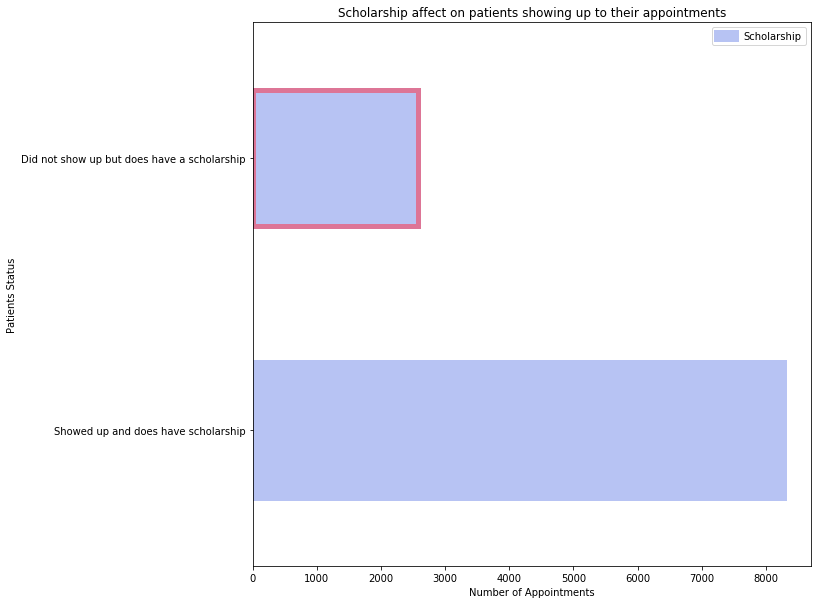

In [97]:
temp_df=df.groupby('Did_Not_Show').Scholarship.value_counts().to_frame()
temp_df.drop(temp_df.index[2], inplace = True)
plo_1=temp_df.iloc[1:3].plot(kind='barh',
                             title='Scholarship affect on patients showing up to their appointments',
                             color='#B7C3F3',
                             edgecolor=['#B7C3F3','#DD7596'],
                             lw = 5,
                             figsize =(10,10));
plo_1.set_xlabel('Number of Appointments');
plo_1.set_ylabel('Patients Status');
plo_1.set_yticklabels(['Showed up and does have scholarship','Did not show up but does have a scholarship']);

Now, let's isolate the bar of interest "Did not show up but does have a scholarship" just to look closer at it and see the numbers more clearly:

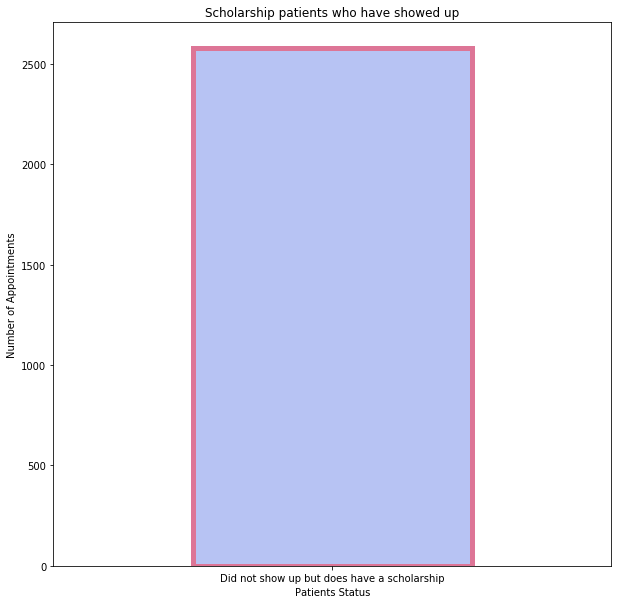

In [98]:
plo_2=df.groupby('Did_Not_Show').Scholarship.value_counts()[-1:].plot(kind='bar',
                                                           title='Scholarship patients who have showed up',
                                                           color='#B7C3F3',
                                                           edgecolor='#DD7596',
                                                           lw=5,
                                                           figsize =(10,10));
plo_2.set_ylabel('Number of Appointments');
plo_2.set_xlabel('Patients Status');
plo_2.set_xticklabels(['Did not show up but does have a scholarship'],rotation=0);

### Answer:
>It appears so, that having a scholarship might encourage the patients to follow up and show up to their appointments.
>
>But having a scholarship doesnot affect the choice of showing up directly because as we saw:
>
>Around 24% of all the patients that have a scholarship did not show for their appointments while the percentage of missed appointments when corresponding to the total number of appointments were only around 20%.

<a id='ques4'></a>
### How frequently each age of patients appear to be having a scholarship?

Let's group our dataframe by scholarship and age so we can visualize the frequencies via a line histogram plot:

### Answer:
> Check the plot below:

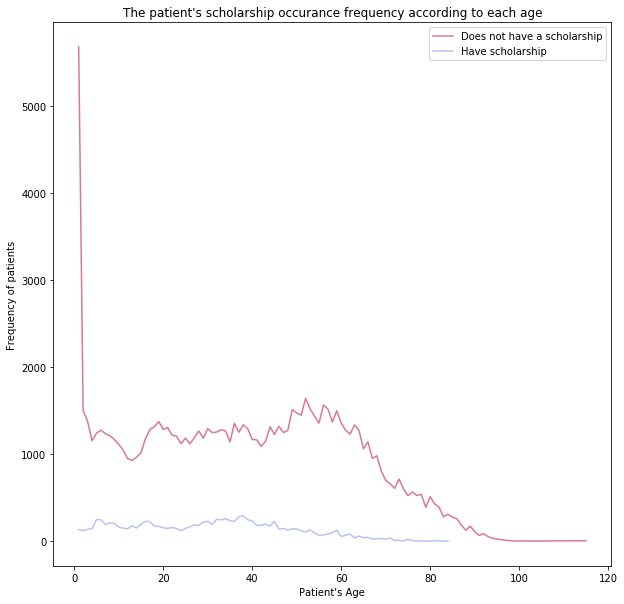

In [99]:
has_scholarship = df.groupby(['Scholarship','Age']).Age.count().loc['Yes']
No_scholarship = df.groupby(['Scholarship','Age']).Age.count().loc['No']
plt.plot(No_scholarship, label='Does not have a scholarship', color='#DD7596');
plt.plot(has_scholarship, label='Have scholarship', color='#B7C3F3');
plt.gcf().set_size_inches(10,10);
plt.title("The patient's scholarship occurance frequency according to each age");
plt.xlabel('Patient\'s Age');
plt.ylabel('Frequency of patients');
plt.legend();

It appears like the scholarship is distributed kind of equally between  patients from age 1 till the late 80's.

<a id='conclusions'></a>
## Conclusions
>"Gender" has no impact whatsoever on the commitment towards showing up for medical appointments.

>20% of patients shedule an appointment at a hospital but did not show up for it.

>Around 24% of all the patients that have a scholarship did not show for their appointments 

>Having a scholarship might encourage the patients to follow up and show up to their appointments.

>Having a scholarship doesnot affect the choice of showing up directly.

>It appears like the scholarship is distributed kind of equally between patients from age 1 till the late 80's.
## Limitations
>The data is big enough but were gathered from only 81 Hospitals in Brazil and of course the outcome could differ in other countries.

>Most of our variables are categorical,which does not allow forahigh level of statistical method that can be used to provide correlations etc.

>We only applied descriptive statistics on this dataset.So we did not create any hypotheses because this will require inferential statistics.

In [100]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0